In [1]:
from src.compute_objectives import *
from src.functions import *

Population de départ :  [{0: 2, 1: 2, 2: 1, 3: 0, 4: 1}, {0: 0, 1: 2, 2: 2, 3: 2, 4: 1}, {0: 2, 1: 2, 2: 1, 3: 2, 4: 1}, {0: 1, 1: 1, 2: 0, 3: 0, 4: 2}, {0: 2, 1: 2, 2: 0, 3: 2, 4: 0}, {0: 1, 1: 0, 2: 2, 3: 2, 4: 0}, {0: 1, 1: 2, 2: 1, 3: 1, 4: 0}, {0: 2, 1: 1, 2: 0, 3: 2, 4: 1}, {0: 0, 1: 2, 2: 2, 3: 1, 4: 1}, {0: 1, 1: 0, 2: 2, 3: 2, 4: 0}]
Evaluation de la population de départ :
 {0: [65.075, 23.75, 0.9005847953216374], 1: [80.275, 21.083333333333332, 0.6666666666666666], 2: [51.475, 17.083333333333336, 0.8097560975609756], 3: [83.425, 27.25, 0.7278287461773699], 4: [49.0, 25.333333333333332, 0.7631578947368421], 5: [94.925, 24.916666666666668, 0.8361204013377926], 6: [76.1, 23.666666666666664, 0.704225352112676], 7: [94.775, 23.083333333333332, 1.0373044524669075], 8: [80.45, 25.166666666666664, 0.7019867549668874], 9: [94.925, 24.916666666666668, 0.8361204013377926]}

Population finale :  [{0: 0, 1: 2, 2: 2, 3: 2, 4: 1}, {0: 0, 1: 2, 2: 2, 3: 2, 4: 1}, {0: 0, 1: 2, 2: 2, 3: 2, 4: 

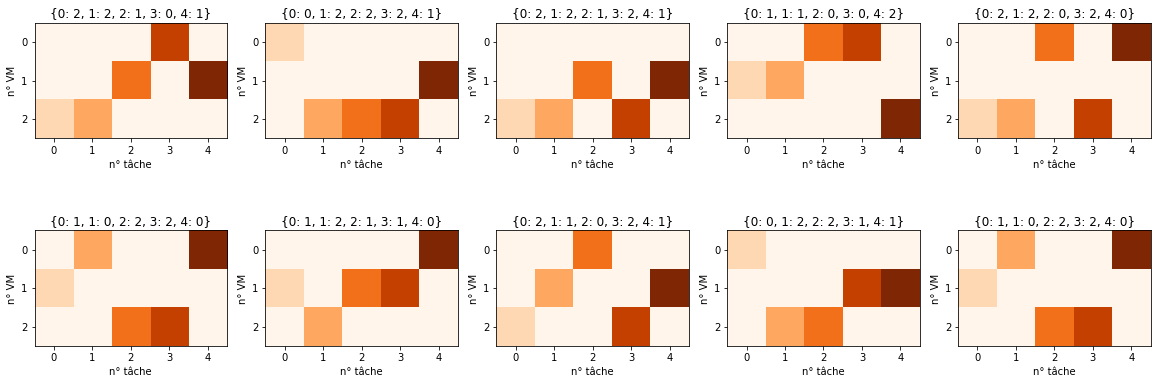

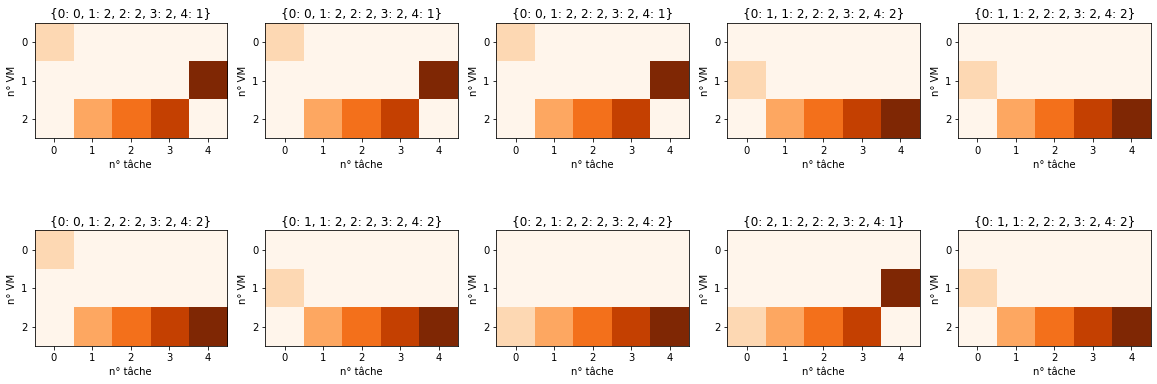

In [2]:
### Algorithme NSGA II

CRITERE_ARRET = 100

# Initialisation de la population de départ
population_depart = create_start_population()
print("Population de départ : ", population_depart)
display_pop(population_depart)

print(
    "Evaluation de la population de départ :\n", evaluate_population(population_depart)
)

# Entrée dans la boucle
for i in range(CRITERE_ARRET):
    # print("\n____ Debut de la boucle ", i)
    # Evaluation de la population
    score = evaluate_population(population_depart)

    # Rang
    rank = ranking(score)
    # print("Rang de la population de départ : ", score)

    ### Child population - début
    selected_solution = selection(population_depart, rank)
    # print("Population sélectionnée : ", selected_solution)

    # Crossover
    crossed_population = crossover(selected_solution)

    # Mutation
    mutated_population = mutation(crossed_population)
    # print("Population enfant : ", mutated_population)
    ### Child population - fin

    # Combinaison des populations
    combined_population = population_depart + mutated_population

    selected_elite_population = elitism_selection(10, combined_population)
    # print("Elite population : ", selected_elite_population)

    # La population elite devient la nouvelle population de départ
    population_depart = selected_elite_population

print("\nPopulation finale : ", selected_elite_population)
display_pop(selected_elite_population)
print(
    "Evaluation de la population finale :\n",
    evaluate_population(selected_elite_population),
)